# Criando os nomes

In [148]:
import pandas as pd

In [149]:
# Pegando dados do site do IBGE os nomes mais frenquentes Masculinos e Femininos - '?qtd=999&sexo=X'
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [150]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [151]:
# Concatena os DataFrames masculinos e femininos
frames = [nomes_f, nomes_m]

In [152]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [153]:
# Transforma o DF contendo apenas a coluna ['nome'] em um DF novo
nomes = pd.concat(frames)['nome'].to_frame()

In [154]:
# seleciona de forma aleatória 5 dados. Neste caso, o nome
nomes.sample(5)

,nome
87,JONAS
164,MARISA
34,CRISTIANE
199,NILZA
56,SUELI


# Incluindo ID dos alunos

In [155]:
import numpy as np
np.random.seed(123)

In [156]:
total_alunos = len(nomes)
total_alunos

400

In [157]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [158]:
nomes.sample(10)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111
84,SEVERINO,78
104,EVA,13
36,ROBERTO,364
4,ADRIANA,343
67,HENRIQUE,64


In [159]:
dominios  = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [160]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [161]:
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()

In [162]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [163]:
!pip3 install html5lib
!pip3 install lxml

In [164]:
import html5lib

In [165]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [166]:
type(cursos)

list

In [167]:
cursos = cursos[0]

In [168]:
type(cursos)

pandas.core.frame.DataFrame

In [169]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [170]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [171]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [172]:
cursos['id'] = cursos.index + 1

In [173]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [174]:
cursos = cursos.set_index('id')

In [175]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos no curso

In [176]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [177]:
# ceil arredonda para cima o número gerado aleatoriamente para todos os alunos pelo exponential
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [178]:
nomes.sample(total_alunos)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1
...,...,...,...,...,...
175,ALEXANDRA,317,@servicodoemail.com,alexandra@servicodoemail.com,1
24,FABIO,400,@servicodoemail.com,fabio@servicodoemail.com,1
86,MAURO,251,@servicodoemail.com,mauro@servicodoemail.com,1
121,ADEMIR,305,@servicodoemail.com,ademir@servicodoemail.com,7


In [179]:
nomes['matriculas'].describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [180]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


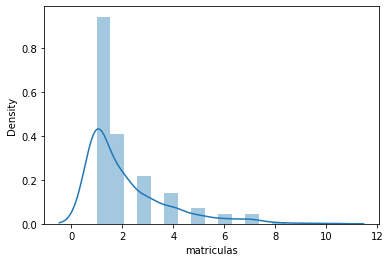

In [181]:
sns.distplot(nomes['matriculas'])

In [182]:
nomes['matriculas'].value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

# Selecionando cursos

In [183]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


In [184]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [185]:
for index, row in nomes.iterrows():
  id = row['id_aluno']
  matriculas = row['matriculas']
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [186]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [187]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [188]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
90,ANDRESSA,213,@servicodoemail.com,andressa@servicodoemail.com,1
191,ERICK,124,@dominiodoemail.com.br,erick@dominiodoemail.com.br,1


In [189]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [190]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12


In [191]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [192]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python


# Saída em diferentes formatos

In [193]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web


In [194]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [195]:
matriculas_json = matriculas_por_curso.to_json()

In [196]:
matriculas_json

'{"quantidade_de_alunos":{"1":59,"2":31,"3":53,"4":4,"5":12,"6":75,"7":32,"8":18,"9":59,"10":40,"11":61,"12":66,"13":14,"14":27,"15":46,"16":43,"17":56,"18":53,"19":75,"20":35},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [197]:
matriculas_html = matriculas_por_curso.to_html()

In [198]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>59</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>31</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>12</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>75</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>32</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>18</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>59</td>
 

# Criando o banco SQL

In [199]:
!pip install sqlalchemy

In [200]:
from sqlalchemy import create_engine, MetaData, Table

In [201]:
# dessa forma o SQL salva em memória local
engine = create_engine('sqlite:///:memory:')

In [202]:
engine

Engine(sqlite:///:memory:)

In [203]:
matriculas_por_curso.to_sql('matriculas', engine)

In [204]:
print(engine.table_names())

['matriculas']


# Buscando do banco SQL

In [205]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [206]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,5,12,Cursos de Python
2,8,18,Novas integrações com Java
3,13,14,Persistência com .NET


In [207]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,59
1,Java para Web,31
2,C# para Web,53
3,Ruby on Rails,4
4,Cursos de Python,12
5,PHP com MySql,75
6,.NET para web,32
7,Novas integrações com Java,18
8,TDD com Java,59
9,Código limpo com C#,40


In [208]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [209]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

# Escrevendo no banco

In [210]:
muitas_matriculas.to_sql('muitas_matirculas', con=engine)

In [211]:
print(engine.table_names())

['matriculas', 'muitas_matirculas']


# Nomes dos alunos e alunas da próxima turma

In [212]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,59,Lógica de programação
2,31,Java para Web
3,53,C# para Web
4,4,Ruby on Rails
5,12,Cursos de Python
6,75,PHP com MySql
7,32,.NET para web
8,18,Novas integrações com Java
9,59,TDD com Java


In [213]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,16
2,43,6
3,43,11
4,43,12
...,...,...
854,383,12
855,366,1
856,366,19
857,366,10


In [214]:
id_curso = 3
proxima_turma = matriculas.query(f'id_curso == {id_curso}')

In [215]:
proxima_turma

,id_aluno,id_curso
14,55,3
25,34,3
50,16,3
51,16,3
104,249,3
121,14,3
130,83,3
137,60,3
145,122,3
164,246,3


In [216]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
137,NAIR,129,@servicodoemail.com,nair@servicodoemail.com,2
199,GEOVANE,366,@servicodoemail.com,geovane@servicodoemail.com,4
54,REGINA,281,@dominiodoemail.com.br,regina@dominiodoemail.com.br,1


In [217]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
2,3,CESAR,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,8
2,3,CESAR,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,8
14,3,SUELI,@dominiodoemail.com.br,sueli@dominiodoemail.com.br,6
16,3,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,9
16,3,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,9
34,3,BRUNA,@servicodoemail.com,bruna@servicodoemail.com,4
52,3,EVANDRO,@dominiodoemail.com.br,evandro@dominiodoemail.com.br,2
55,3,MARCIA,@dominiodoemail.com.br,marcia@dominiodoemail.com.br,3
60,3,FLAVIA,@servicodoemail.com,flavia@servicodoemail.com,4


In [218]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2          CESAR
2          CESAR
14         SUELI
16       CLAUDIA
16       CLAUDIA
34         BRUNA
52       EVANDRO
55        MARCIA
60        FLAVIA
61         DIOGO
75         NEUSA
83        ISABEL
90      CLEONICE
100       ISMAEL
105       MARISA
114         ERIC
121      TAMIRES
122     PRISCILA
126       FATIMA
127      JONATAN
137        DALVA
137        DALVA
145        KATIA
155       CLEBER
165       REBECA
170    REGINALDO
176      GIOVANA
184       JUNIOR
206        ITALO
208         LUIZ
216       VICTOR
219      GABRIEL
222      IVONETE
230       CARLOS
231       WALTER
234         ADAO
246        LAURA
249       ANGELA
274     VERONICA
280         LAIS
292       ANDREA
298       GISELE
300      GEOVANA
308      REGIANE
308      REGIANE
323      MICHAEL
334       JANETE
335     DENILSON
345         IGOR
348       DANILO
351      EMANUEL
357        JOICE
392       NELSON
Name: nome, dtype: object

In [219]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,CESAR
2,CESAR
14,SUELI
16,CLAUDIA
16,CLAUDIA
34,BRUNA
52,EVANDRO
55,MARCIA
60,FLAVIA


In [220]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    C# para Web
Name: 3, dtype: object

In [221]:
nome_curso = nome_curso['nome_do_curso']
nome_curso

'C# para Web'

In [222]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [223]:
proxima_turma

,nome
id_aluno,
2,CESAR
2,CESAR
14,SUELI
16,CLAUDIA
16,CLAUDIA
34,BRUNA
52,EVANDRO
55,MARCIA
60,FLAVIA


In [224]:
proxima_turma = proxima_turma.rename(columns={'nome': f'Alunos do Curso de {nome_curso}'})

In [225]:
proxima_turma

,Alunos do Curso de C# para Web
id_aluno,
2,CESAR
2,CESAR
14,SUELI
16,CLAUDIA
16,CLAUDIA
34,BRUNA
52,EVANDRO
55,MARCIA
60,FLAVIA


# Excel

In [226]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [227]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do Curso de C# para Web
0,CESAR
1,CESAR
2,SUELI
3,CLAUDIA
4,CLAUDIA
5,BRUNA
6,EVANDRO
7,MARCIA
8,FLAVIA
9,DIOGO
